In [1]:
import os
import datetime
import numpy as np
import csv
import pickle
from matplotlib import pyplot as plt 
import statistics 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import math

import statsmodels.api as sm
from scipy.interpolate import interp1d

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# import tensorflow as tf
import joblib

In [2]:
with open('dataofallmatchesinfirstfiveyears.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    matches1st5yrs = unpickler.load() 
    file.close()

totalRuns=[]
for matchNo in range(len(matches1st5yrs)):
    ballKeys=list(matches1st5yrs[matchNo]['ourData'].keys())
    ballKeys.sort(reverse=True)
    totalRunInInnings=matches1st5yrs[matchNo]['ourData'][ballKeys[-1]]['totalrunscount']
    totalRuns.append(totalRunInInnings)
joblib.dump(totalRuns, '1st5yrs_1stInnings_2/totalRuns1stInnings.joblib')
# inningsTotals = joblib.load('1st5yrs_1stInnings_2/totalRuns1stInnings.joblib') 

def getWickRemCategorical(w):
    x=[0]*11
    x[w]=1
    return x

dataFolder='1st5yrs_1stInnings_2'
OLS_ballByBallDict_catWickRem = joblib.load(dataFolder+'/OLS_ballByBallDict_catWickRem.joblib')
def get_OLS_ballByBallDict_catWickRem(ballRem=119,wicketRem=10,runScored=0):
    x=getWickRemCategorical(wicketRem)
    x.insert(0,1)
#     x.append(runScored)
#     return round(OLS_ballByBallDict_catWickRem[ballRem].predict(x)[0],0)
#     return round(np.median(inningsTotals)+(OLS_ballByBallDict_catWickRem[ballRem].predict(x)[0]-np.median(inningsTotals))*ballweight[ballRem],0)
    return round((ballByBallMedian[0]-ballByBallMedian[ballRem])+\
                 (OLS_ballByBallDict_catWickRem[ballRem].predict(x)[0]-(ballByBallMedian[0]-ballByBallMedian[ballRem]) )*ballweight[ballRem],0)

SVR_ballByBallDict_catWickRem = joblib.load(dataFolder+'/SVR_ballByBallDict_catWickRem.joblib')
def get_SVR_ballByBallDict_catWickRem(ballRem=119,wicketRem=10,runScored=0):
    x=getWickRemCategorical(wicketRem)
#     x.append(runScored)
    return round(SVR_ballByBallDict_catWickRem[ballRem].predict([x])[0],0)

OLS_ballByBallDict_numWickRem = joblib.load(dataFolder+'/OLS_ballByBallDict_numWickRem.joblib')
def get_OLS_ballByBallDict_numWickRem(ballRem=119,wicketRem=10,runScored=0):
    x=[wicketRem]
    x.insert(0,1)
#     x.append(runScored)
    return round(OLS_ballByBallDict_numWickRem[ballRem].predict(x)[0],0)

SVR_ballByBallDict_numWickRem = joblib.load(dataFolder+'/SVR_ballByBallDict_numWickRem.joblib')
def get_SVR_ballByBallDict_numWickRem(ballRem=119,wicketRem=10,runScored=0):
    x=[wicketRem]
#     x.append(runScored)
    return round(SVR_ballByBallDict_numWickRem[ballRem].predict([x])[0],0)

OLS_ballRemAsFeature_catWickRem = joblib.load(dataFolder+'/OLS_ballRemAsFeature_catWickRem.joblib')
def get_OLS_ballRemAsFeature_catWickRem(ballRem=119,wicketRem=10,runScored=0):
    x=getWickRemCategorical(wicketRem)
    x.insert(0,1)
#     x.append(runScored)
    x.append(ballRem)
    return round(OLS_ballRemAsFeature_catWickRem.predict(x)[0],0)

SVR_ballRemAsFeature_catWickRem = joblib.load(dataFolder+'/SVR_ballRemAsFeature_catWickRem.joblib')
def get_SVR_ballRemAsFeature_catWickRem(ballRem=119,wicketRem=10,runScored=0):
    x=getWickRemCategorical(wicketRem)
#     x.append(runScored)
    x.append(ballRem)
    return round(SVR_ballRemAsFeature_catWickRem.predict([x])[0],0)

OLS_ballRemAsFeature_numWickRem = joblib.load(dataFolder+'/OLS_ballRemAsFeature_numWickRem.joblib')
def get_OLS_ballRemAsFeature_numWickRem(ballRem=119,wicketRem=10,runScored=0):
    x=[wicketRem]
    x.insert(0,1)
#     x.append(runScored)
    x.append(ballRem)
    return round(OLS_ballRemAsFeature_numWickRem.predict(x)[0],0)

SVR_ballRemAsFeature_numWickRem = joblib.load(dataFolder+'/SVR_ballRemAsFeature_numWickRem.joblib')
def get_SVR_ballRemAsFeature_numWickRem(ballRem=119,wicketRem=10,runScored=0):
    x=[wicketRem]
#     x.append(runScored)
    x.append(ballRem)
    return round(SVR_ballRemAsFeature_numWickRem.predict([x])[0],0)


# with open('totalRuns1stInnings.pkl', 'rb') as file: 
#     unpickler = pickle.Unpickler(file)
#     inningsTotals = unpickler.load() 
#     file.close()
    

with open('allMatchesBallByBall.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    allMatchesBallByBall = unpickler.load() 
    file.close()
# with open('XYdata_num.pkl', 'rb') as file: 
#     unpickler = pickle.Unpickler(file)
#     XYdata_num = unpickler.load() 
#     file.close()
# with open('XYdata_cat.pkl', 'rb') as file: 
#     unpickler = pickle.Unpickler(file)
#     XYdata_cat = unpickler.load() 
#     file.close()
# with open('OLS_cat1stInnings.pkl', 'rb') as file: 
#     unpickler = pickle.Unpickler(file)
#     OLSdict_cat = unpickler.load() 
#     file.close()
# with open('OLS_num1stInnings.pkl', 'rb') as file: 
#     unpickler = pickle.Unpickler(file)
#     OLSdict_num = unpickler.load() 
#     file.close()
# with open('SVR_cat1stInnings.pkl', 'rb') as file: 
#     unpickler = pickle.Unpickler(file)
#     SVRdict_cat = unpickler.load() 
#     file.close()
# with open('SVR_num1stInnings.pkl', 'rb') as file: 
#     unpickler = pickle.Unpickler(file)
#     SVRdict_num = unpickler.load() 
#     file.close()


# def OLScatPredict(ballRem=119,wicketRem=10,runScored=0):
#     predictData=getWickRemCategorical(wicketRem)
#     predictData.append(runScored)
#     predictData.insert(0,1)
#     return OLSdict_cat[ballRem].predict(predictData)[0]
# # print(OLScatPredict(ballRem=100,wicketRem=10,runScored=30))

# def OLSnumPredict(ballRem=119,wicketRem=10,runScored=0):
#     return OLSdict_num[ballRem].predict([1,runScored,wicketRem])[0]
# # print(OLSnumPredict(ballRem=100,wicketRem=10,runScored=30))

# def SVRcatPredict(ballRem=119,wicketRem=10,runScored=0):
#     predictData=getWickRemCategorical(wicketRem)
#     predictData.append(runScored)
#     return SVRdict_cat[ballRem].predict([predictData])[0]
# # print(SVRcatPredict(ballRem=100,wicketRem=10,runScored=30))

# def SVRnumPredict(ballRem=119,wicketRem=10,runScored=0):
#     return SVRdict_num[ballRem].predict([[runScored,wicketRem]])[0]
# # print(SVRnumPredict(ballRem=100,wicketRem=10,runScored=30))

In [3]:
totalRuns={}
for b in range(120):
    totalRuns[b]=0
for match in matches1st5yrs:
    for ball in match['ourData']:
        try: 
            totalRuns[ball]+= match['ourData'][ball]['totalrunscount']
        except:
            None

ballweight={}
for b in range(120):
    ballweight[b]=totalRuns[b]/totalRuns[0]

ballByBallMedian={}
for b in range(120):
    ballByBallMedian[b]=[]
for match in matches1st5yrs:
    for ball in match['ourData']:
        try: 
            ballByBallMedian[ball].append(match['ourData'][ball]['totalrunscount'])
        except:
            None
for b in range(120):
    ballByBallMedian[b]=np.median(ballByBallMedian[b])

In [4]:
b,w=19,3
print(get_OLS_ballByBallDict_catWickRem(ballRem=b,wicketRem=w))

24.0


In [5]:
firstBatWinningRuns,firstBatLosingRuns=[],[]

for match in range(len(allMatchesBallByBall)):
    totalRun=0
    for ballInfo in allMatchesBallByBall[match]['innings'][0]:
        ballKey=list(ballInfo.keys())[0]
        totalRun+=ballInfo[ballKey]['runs']['total']
    try:
        if (allMatchesBallByBall[match]['teams'][0]==allMatchesBallByBall[match]['winner']):
            firstBatWinningRuns.append(totalRun)
        else:
            firstBatLosingRuns.append(totalRun)
    except:
        None
midRun=(np.median(firstBatWinningRuns)+np.median(firstBatLosingRuns))/2

In [6]:
match=50
ballKeys=list(matches1st5yrs[match]['ourData'].keys())
ballKeys.sort(reverse=True)
c=1
midDiff,balls=[],[]
for b in ballKeys:
    runScored=matches1st5yrs[match]['ourData'][b]['totalrunscount']
    wicktRem=matches1st5yrs[match]['ourData'][b]['wicketsremaining']
    predicted=runScored+get_OLS_ballByBallDict_catWickRem(ballRem=b,wicketRem=wicktRem,runScored=runScored)
    
#     print(b,round(1/(1+np.exp((midRun-predicted)*c)))*100,2)
    midDiff.append(predicted-midRun)
    balls.append(120-b)

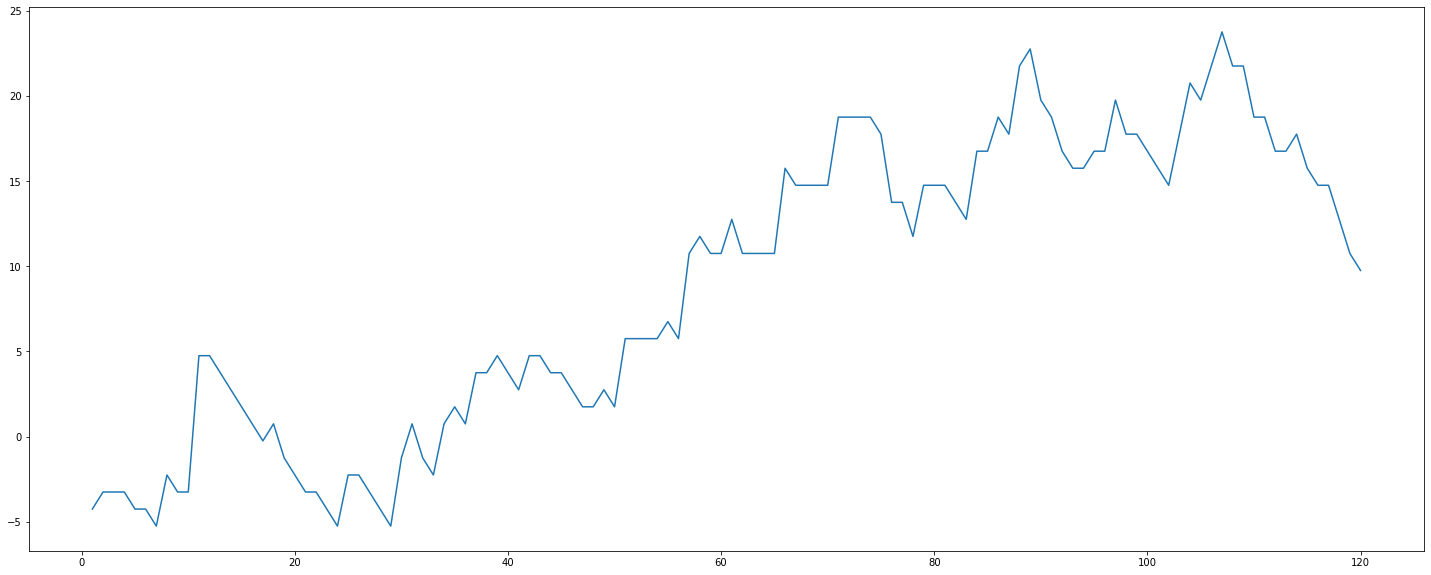

In [7]:
fig=plt.figure(figsize=(25,10))
plt.plot(balls,midDiff)
plt.show()

In [8]:
def getXYdata(ballRemType,wickRemType):
    XYdata={}
    if ballRemType=='ballRemAsFeature':
        XYdata['X'],XYdata['Y']=[],[]
    for matchNo in range(len(matches1st5yrs)):
        totalRunThisMatch=inningsTotals[matchNo]

        ballRem=list(matches1st5yrs[matchNo]['ourData'].keys())
        ballRem.sort(reverse=True)

        for b in ballRem:
            thiswicketsremaining=matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']
            thisBallRun=matches1st5yrs[matchNo]['ourData'][b]['totalrunscount']
            
            if ballRemType=='ballByBallDict':
                if XYdata.get(b)is None: # for ballByBallDict
                    XYdata[b]={}
                    XYdata[b]['X']=[]
                    XYdata[b]['Y']=[]
                XYdata[b]['Y'].append(totalRunThisMatch-thisBallRun)
            elif ballRemType=='ballRemAsFeature':
                XYdata['Y'].append(totalRunThisMatch-thisBallRun)
                
            if wickRemType=='cat':
                x=getWickRemCategorical(thiswicketsremaining)
            elif wickRemType=='num':
#                 x=[sum(W[10-thiswicketsremaining:])] # weighted wicket-rem
                x=[thiswicketsremaining] # weighted wicket-rem
    
#             x.append(thisBallRun)

            if ballRemType=='ballRemAsFeature':
                x.append(b)
                
            if ballRemType=='ballByBallDict':
                XYdata[b]['X'].append(x)
            elif ballRemType=='ballRemAsFeature':
                XYdata['X'].append(x)
    return XYdata

for ballRemType in ['ballByBallDict','ballRemAsFeature']:
    for wickRemType in ['cat','num']:
        eval('joblib.dump(getXYdata(ballRemType,wickRemType), \'1st5yrs_1stInnings_2/XYdata_' +ballRemType+ '_' +wickRemType+ 'WickRem.joblib\')')

NameError: name 'inningsTotals' is not defined

In [203]:
for wickRemType in ['cat','num']:
    for ballRemType in ['ballByBallDict','ballRemAsFeature']:
        for regModel in ['OLS','SVR']:
            XYdata = joblib.load('1st5yrs_1stInnings_2/XYdata_'+ballRemType+'_'+wickRemType+'WickRem.joblib')
            
            if ballRemType=='ballByBallDict':
                fitModel={}
                for j in range(120):
                    if regModel=='OLS':
                        ConstAdded=sm.add_constant(XYdata[j]['X'])
                        model = sm.OLS(XYdata[j]['Y'],ConstAdded)
                        fitModel[j]=model.fit()  #.fit(cov_type='cluster')  
#                     if regModel=='SVR': 
#                         regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
#                         regr.fit(np.array(XYdata[j]['X']), np.array(XYdata[j]['Y']))
#                         fitModel[j]=regr
                        
            if ballRemType=='ballRemAsFeature':
                if regModel=='OLS':
                    ConstAdded=sm.add_constant(XYdata['X'])
                    model = sm.OLS(XYdata['Y'],ConstAdded)
                    fitModel=model.fit()
#                 if regModel=='SVR':
#                     regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
#                     regr.fit(np.array(XYdata['X']), np.array(XYdata['Y']))
#                     fitModel=regr
                    
            joblib.dump(fitModel, '1st5yrs_1stInnings_2/'+regModel+'_'+ballRemType+'_'+wickRemType+'WickRem.joblib')

In [168]:
def getMeanErrorList(modelName,calcTargetDiff=False):
    ErrorList,targetDiff=[],[]
    for b in range(120):
        count=0
        thisBallErrorList=[]
        for matchNo in range(len(matches1st5yrs)):
            if matches1st5yrs[matchNo]['ourData'].get(b) is None:
                continue
            totalRunInInnings=inningsTotals[matchNo]
            wicketRem=matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']
            runScored=matches1st5yrs[matchNo]['ourData'][b]['totalrunscount']
            
            predictedScore=runScored+eval('get_'+modelName+'(ballRem=b,wicketRem=wicketRem,runScored=runScored)')
            
            if np.abs(predictedScore-totalRunInInnings)<10:
                count+=1
                
#             thisBallErrorList.append(np.abs(totalRunInInnings-predictedScore))
            thisBallErrorList.append(np.sqrt(((totalRunInInnings/predictedScore)-1)**2))
            
        ErrorList.append(np.mean(thisBallErrorList))
        targetDiff.append(round((count/len(matches1st5yrs))*100,2))
        
    if calcTargetDiff:
        return ErrorList,targetDiff
    return ErrorList

In [30]:
# SVRdict_cat={}
# for j in range(120):
#     regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
#     regr.fit(np.array(XYdata[j]['X']), np.array(XYdata[j]['Y']))
#     SVRdict_cat[j]=regr
    
# with open('SVR_cat1stInnings.pkl', 'wb') as file: 
#     pickle.dump(SVRdict_cat, file)
    
# with open('OLS_cat1stInnings.pkl', 'wb') as file: 
#     pickle.dump(OLSdict_cat, file)

# ConstAdded=sm.add_constant(XYdata['X'])
# model = sm.OLS(XYdata['Y'],ConstAdded)
# OLSdict=model.fit()  #.fit(cov_type='cluster')  

# regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
# regr.fit(np.array(XYdata['X']), np.array(XYdata['Y']))
# SVRdict=regr

In [5]:
model = tf.keras.models.load_model('regression_1stInng_fromFirst5IPL')

# model.predict(np.array([[  1., 7.,  20.,  1.]]))

OLS_ballByBallDict_catWickRem


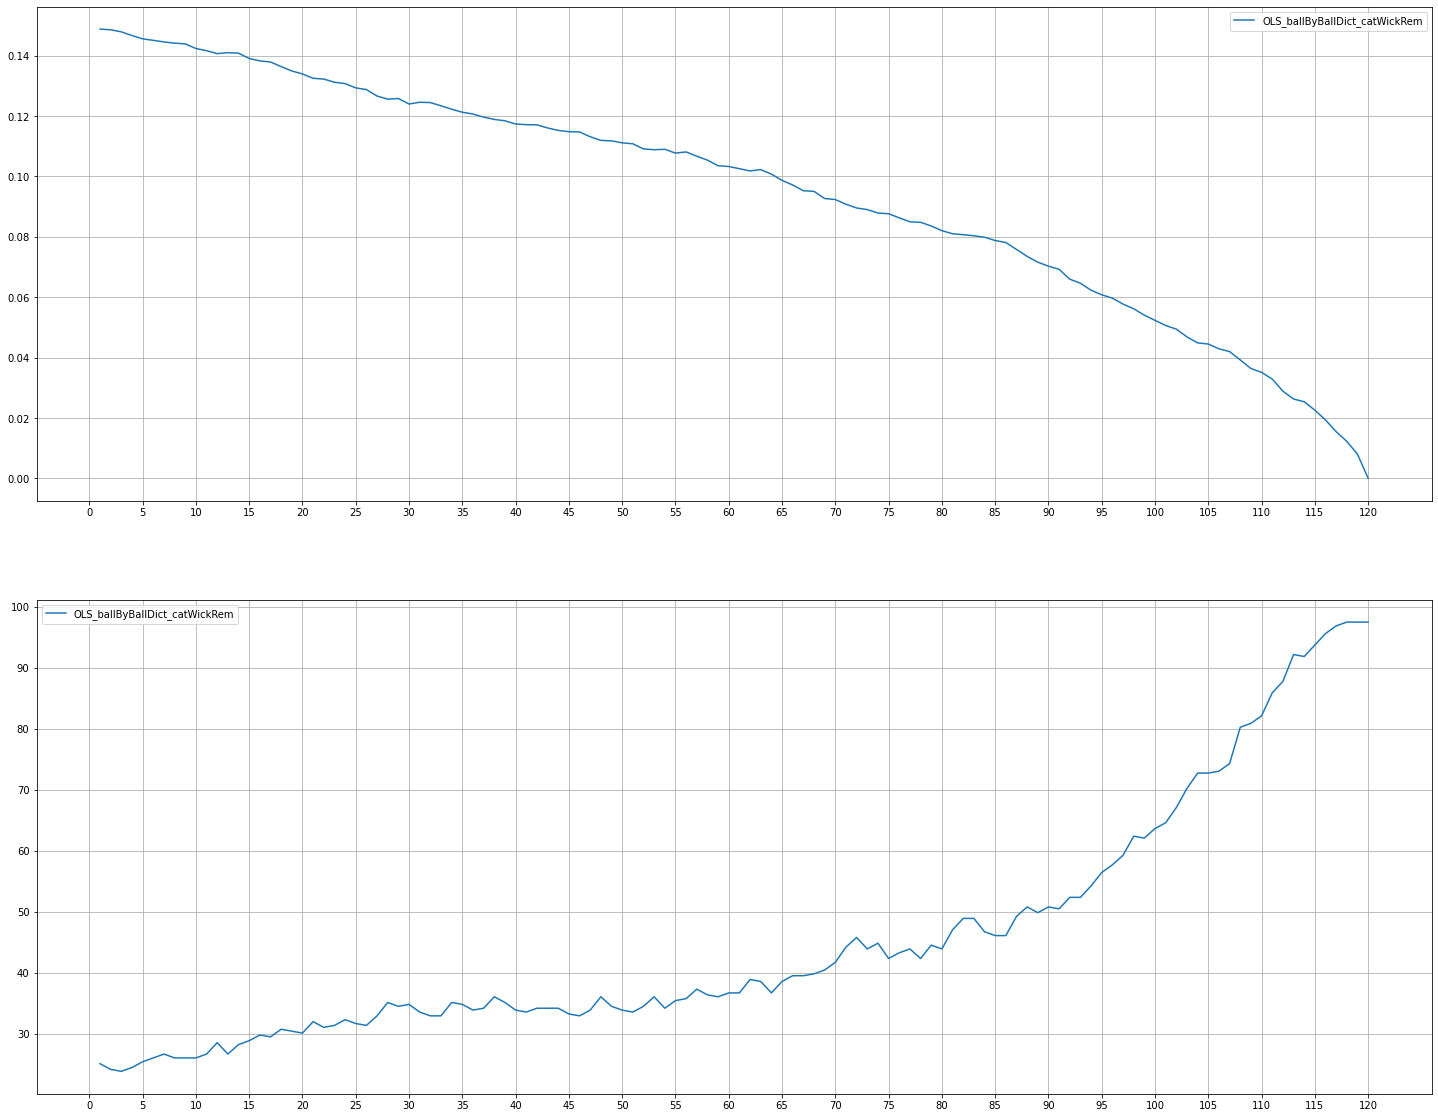

In [223]:
modelNames=[]
modelNames.append('OLS_ballByBallDict_catWickRem')
# modelNames.append('OLS_ballByBallDict_numWickRem')
# modelNames.append('OLS_ballRemAsFeature_catWickRem')
# modelNames.append('OLS_ballRemAsFeature_numWickRem')
# modelNames.append('SVR_ballByBallDict_catWickRem')
# modelNames.append('SVR_ballByBallDict_numWickRem')
# modelNames.append('SVR_ballRemAsFeature_catWickRem')
# modelNames.append('SVR_ballRemAsFeature_numWickRem')

meanErrorLists,targetDiffs=[],[]
for m in modelNames:
    print(m)
    thisModeleanError,thisModelTargetDiff=getMeanErrorList(m,calcTargetDiff=True)
    meanErrorLists.append(thisModeleanError)
    targetDiffs.append(thisModelTargetDiff)
    
Balls=np.arange(120,0,-1)
    
fig=plt.figure(figsize=(25,20))
plt.subplot(2, 1, 1)
for m in range(len(modelNames)):
    plt.plot(Balls,meanErrorLists[m],label=modelNames[m])
plt.xticks(np.arange(0,121,5))
plt.legend()
plt.grid()
plt.subplot(2, 1, 2)
for m in range(len(modelNames)):
    plt.plot(Balls,targetDiffs[m],label=modelNames[m])
plt.xticks(np.arange(0,121,5))
plt.legend()
plt.grid()
plt.show()

In [15]:
ballWeight

NameError: name 'ballWeight' is not defined

In [7]:
from sklearn.model_selection import train_test_split

In [53]:
W=[5,5,5,4,4,3,3,2,.5,.5,0]
w,b=6,80
sum(W[10-w:])*((60-(np.abs(60-b)))/120)

4.333333333333333

In [137]:
XYdata={}

XYdata['X']=[]
XYdata['Y']=[]

for matchNo in range(len(matches1st5yrs)):
    ballRem=list(matches1st5yrs[matchNo]['ourData'].keys())
    ballRem.sort(reverse=True)
    totalRunThisMatch=matches1st5yrs[matchNo]['ourData'][ballRem[-1]]['totalrunscount']
    
    for b in ballRem:
        if b<0:
            continue

#         if XYdata.get(b)is None:
#             XYdata[b]={}
#             XYdata[b]['X']=[]
#             XYdata[b]['Y']=[]

#         XYdata[b]['Y'].append(totalRunThisMatch)
        XYdata['Y'].append(totalRunThisMatch-thisBallRun)
    
        thiswicketsremaining=matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']
        thisBallRun=matches1st5yrs[matchNo]['ourData'][b]['totalrunscount']
        
        #for wicketRem numeric
#         XYdata[b]['X'].append([thisBallRun,thiswicketsremaining])
    
        #for wicketRem categorical
#         x=getWickRemCategorical(thiswicketsremaining)
#         x.append(thisBallRun)
#         XYdata[b]['X'].append(x)
#         XYdata['X'].append([thisBallRun,ballWeight[b],sum(W[10-thiswicketsremaining:])])
#         XYdata['X'].append([b,thisBallRun,ballWeight[b],sum(W[10-thiswicketsremaining:])*((60-(np.abs(60-b)))/120)])
#         XYdata['X'].append([b,thisBallRun,thiswicketsremaining])
        XYdata['X'].append([b,thiswicketsremaining])

# with open('XYdata_num.pkl', 'wb') as file: 
#     pickle.dump(XYdata, file)

XYdata['X']=np.array(XYdata['X'])
y1=np.array(XYdata['Y'])

In [138]:
x1 = np.column_stack((XYdata['X'][:,0],XYdata['X'][:,1]))
x1 = sm.add_constant(x1, prepend=True)

X_train, X_test, y_train, y_test = train_test_split(x1, y1)
y_train=np.reshape(y_train, (-1,1))

In [10]:
import tensorflow
tensorflow.random.set_random_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor


C:\Users\sampr\Anaconda3\envs\sam_dl\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sampr\Anaconda3\envs\sam_dl\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sampr\Anaconda3\envs\sam_dl\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sampr\Anaconda3\envs\sam_dl\lib\site-packages\tensorflow\pyth

In [139]:
tensorflow.keras.backend.clear_session()

In [143]:
model = Sequential()
model.add(Dense(3, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(780, activation='relu'))
model.add(Dense(384, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              4096      
_________________________________________________________________
dense_10 (Dense)             (None, 780)               799500    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               399872    
_________________________________________________________________
dense_12 (Dense)             (None, 384)               196992    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               98560     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
__________

In [151]:
# model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=10, batch_size=30, verbose=1, validation_split=0.2)

Train on 22812 samples, validate on 5704 samples
Epoch 1/10
22812/22812 [==============================] - 7s 287us/sample - loss: 632.3807 - mean_squared_error: 632.3808 - mean_absolute_error: 16.6876 - val_loss: 645.3945 - val_mean_squared_error: 645.3943 - val_mean_absolute_error: 16.3655
Epoch 2/10
22812/22812 [==============================] - 7s 287us/sample - loss: 627.6004 - mean_squared_error: 627.6002 - mean_absolute_error: 16.5382 - val_loss: 624.3207 - val_mean_squared_error: 624.3208 - val_mean_absolute_error: 15.9822
Epoch 3/10
22812/22812 [==============================] - 7s 290us/sample - loss: 617.1030 - mean_squared_error: 617.1034 - mean_absolute_error: 16.3717 - val_loss: 600.1476 - val_mean_squared_error: 600.1478 - val_mean_absolute_error: 16.0315
Epoch 4/10
22812/22812 [==============================] - 6s 284us/sample - loss: 619.5394 - mean_squared_error: 619.5396 - mean_absolute_error: 16.4567 - val_loss: 602.3770 - val_mean_squared_error: 602.3771 - val_mean

1 29 9.09
2 25 7.84
3 22 6.9
4 24 7.52
5 20 6.27
6 20 6.27
7 21 6.58
8 19 5.96
9 20 6.27
10 23 7.21
11 25 7.84
12 23 7.21
13 25 7.84
14 26 8.15
15 27 8.46
16 27 8.46
17 29 9.09
18 28 8.78
19 27 8.46
20 22 6.9
21 24 7.52
22 23 7.21
23 29 9.09
24 26 8.15
25 28 8.78
26 26 8.15
27 25 7.84
28 29 9.09
29 25 7.84
30 20 6.27
31 23 7.21
32 28 8.78
33 30 9.4
34 35 10.97
35 36 11.29
36 35 10.97
37 37 11.6
38 34 10.66
39 34 10.66
40 38 11.91
41 37 11.6
42 39 12.23
43 36 11.29
44 41 12.85
45 39 12.23
46 41 12.85
47 40 12.54
48 39 12.23
49 39 12.23
50 40 12.54
51 44 13.79
52 38 11.91
53 37 11.6
54 36 11.29
55 37 11.6
56 41 12.85
57 44 13.79
58 43 13.48
59 46 14.42
60 42 13.17
61 45 14.11
62 48 15.05
63 46 14.42
64 52 16.3
65 52 16.3
66 55 17.24
67 58 18.18
68 57 17.87
69 54 16.93
70 52 16.3
71 46 14.42
72 44 13.79
73 40 12.54
74 50 15.67
75 53 16.61
76 56 17.55
77 59 18.5
78 56 17.55
79 59 18.5
80 65 20.38
81 64 20.06
82 72 22.57
83 75 23.51
84 74 23.2
85 73 22.88
86 71 22.26
87 77 24.14
88 84 26.33

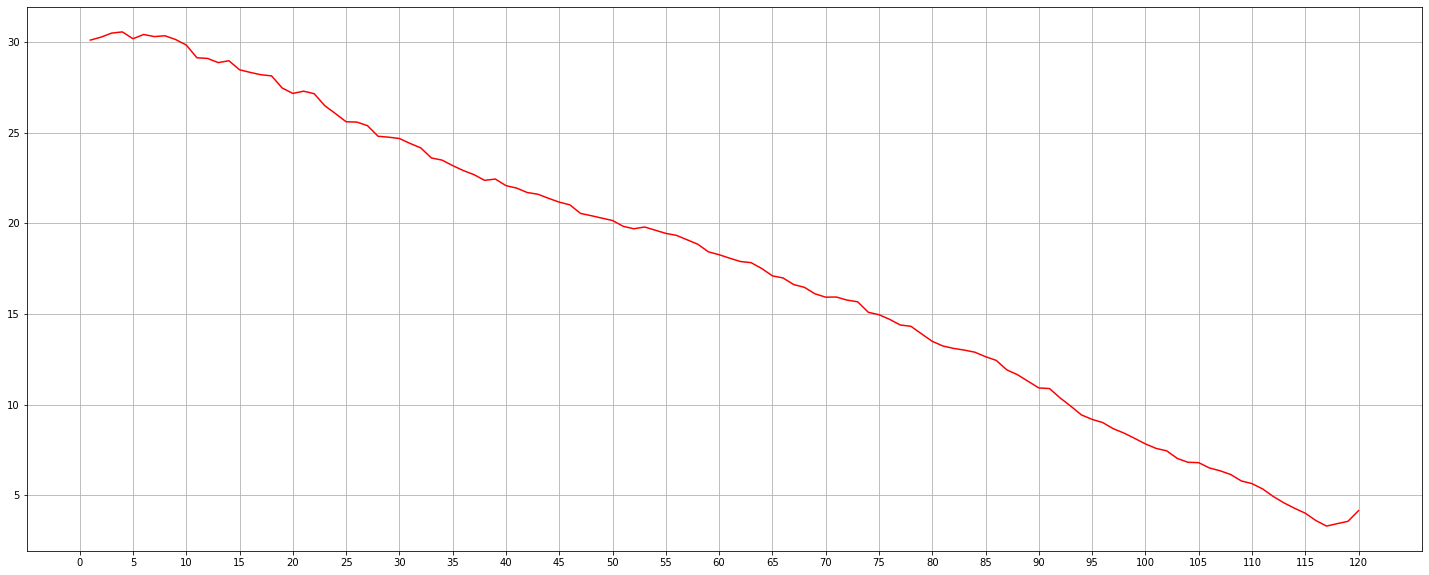

In [152]:
errorListNN=[]
Balls=[]
for b in range(119,-1,-1):
    count=0
    thisBallErrorListNN=[]
    
    for matchNo in range(len(matches1st5yrs)):
        totalRunInInnings=inningsTotals[matchNo]
        if matches1st5yrs[matchNo]['ourData'].get(b) is not None:
            wicketRem=matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']
            runScored=matches1st5yrs[matchNo]['ourData'][b]['totalrunscount']
            
            NNscore=runScored+round(model.predict(np.array([[  1., b,   wicketRem]]))[0][0],0)
            thisBallErrorListNN.append(np.abs(NNscore-totalRunInInnings))
            
            if np.abs(NNscore-totalRunInInnings)<5:
                count+=1
#                 print(str(runScored)+'/'+str(10-wicketRem),round(OLScatscore,2),totalRunInInnings,round(OLScatscore-totalRunInInnings,2))
            
#         break # break to get result for only matchNo 0
    
    errorListNN.append(np.mean(thisBallErrorListNN))
    Balls.append(120-b)
    print(120-b,count,round((count/len(matches1st5yrs))*100,2))

fig=plt.figure(figsize=(25,10))
plt.plot(Balls,errorListNN,color='r')
plt.xticks(np.arange(0,121,5))
plt.grid()
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------------------------------------

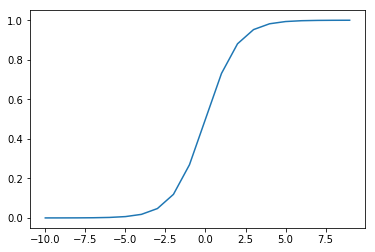

In [83]:
X=np.arange(-10,10)
Y=np.exp(X)/(1+np.exp(X))
plt.plot(X,Y)
plt.show()

In [46]:
maxDict={}
minDict={}
differFromMedianList={}
for b in range(1,120):  #b: ball remaining
    differFromMedianListThisBall=[]


    for matchNo in range(len(matches1st5yrs)):
        ballKeys=list(matches1st5yrs[matchNo]['ourData'].keys())
        ballKeys.sort(reverse=True)
        totalRunInInnings=matches1st5yrs[matchNo]['ourData'][ballKeys[-1]]['totalrunscount']

        try:
#             predictData=[1]
#             for i in range(11):
#                 predictData.append(0)
#             predictData[matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']+1]=1
#             predictData.append(matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])
            
            OLSscore=OLSpredict(ballRem=b,wicketRem=matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining'],runScored=matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])

#             differMedian=results[120-b].predict(predictData)[0]-172.5
            differMedian=OLSscore-172.5
            differFromMedianListThisBall.append(differMedian)
        except:
            None
    differFromMedianList[b]=differFromMedianListThisBall
    maxDict[b]=max(differFromMedianListThisBall)
    minDict[b]=min(differFromMedianListThisBall)

In [47]:
differFromMedianList[119]

[-14.794348015888772,
 -15.628650645616318,
 -15.628650645616318,
 -15.628650645616318,
 -14.794348015888772,
 -15.628650645616318,
 -15.628650645616318,
 -14.794348015888772,
 -15.628650645616318,
 -15.628650645616318,
 -14.794348015888772,
 -13.960045386161198,
 -15.628650645616318,
 -15.628650645616318,
 -14.794348015888772,
 -14.794348015888772,
 -14.794348015888772,
 -15.628650645616318,
 -15.628650645616318,
 -14.794348015888772,
 -15.628650645616318,
 -15.628650645616318,
 -15.628650645616318,
 -17.19061466138953,
 -14.794348015888772,
 -15.628650645616318,
 -15.628650645616318,
 -15.628650645616318,
 -15.628650645616318,
 -12.291440126706107,
 -15.628650645616318,
 -15.628650645616318,
 -12.291440126706107,
 -14.794348015888772,
 -14.794348015888772,
 -15.628650645616318,
 -13.960045386161198,
 -15.628650645616318,
 -15.628650645616318,
 -15.628650645616318,
 -12.291440126706107,
 -15.628650645616318,
 -15.628650645616318,
 -10.622834867251015,
 -15.628650645616318,
 -15.628650

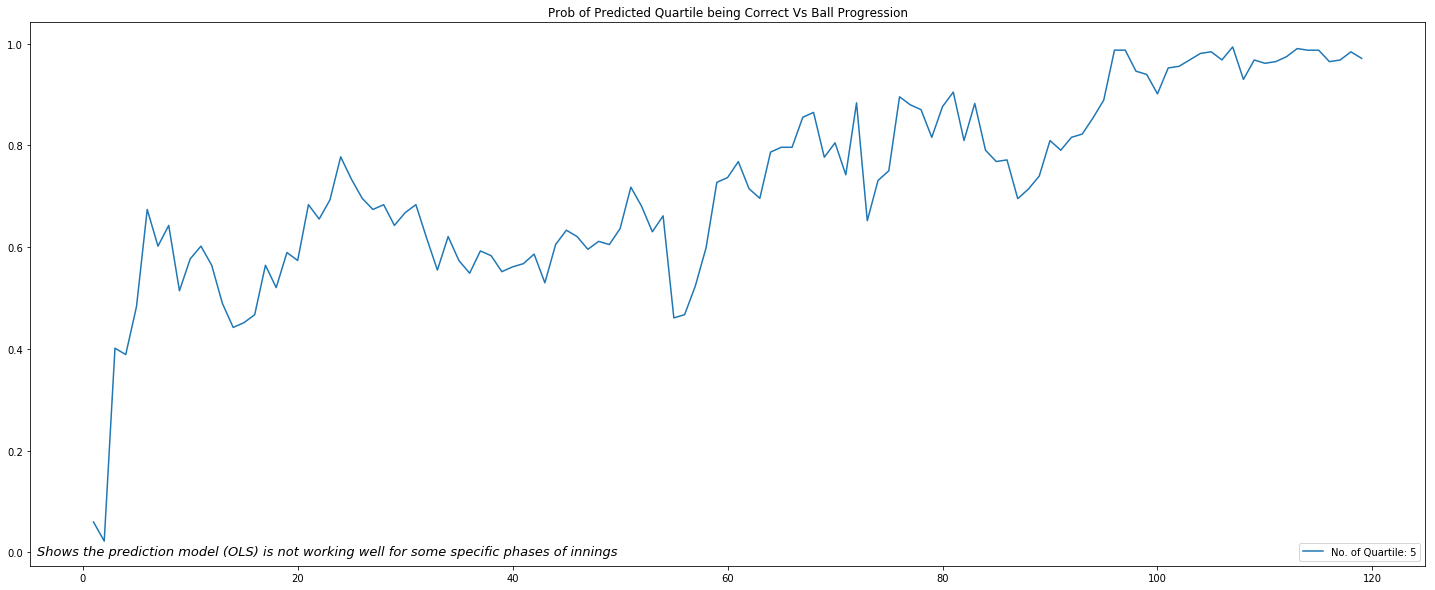

In [48]:
fig =plt.figure(figsize=(25, 10)) 
ax = fig.add_subplot(111)
Q=np.arange(5,6,1)
for Quartiles in Q:
    totalRunsFromMedian=[]
    for matchNo in range(len(matches1st5yrs)):  
        ballKeys=list(matches1st5yrs[matchNo]['ourData'].keys())
        ballKeys.sort(reverse=True)
        totalRunInInnings=matches1st5yrs[matchNo]['ourData'][ballKeys[-1]]['totalrunscount']  
        totalRunsFromMedian.append(totalRunInInnings-172.5)



    startRangeTFM=list(np.arange(min(totalRunsFromMedian),max(totalRunsFromMedian),(max(totalRunsFromMedian)-min(totalRunsFromMedian))/Quartiles))
    endRangeTFM=startRangeTFM[1:]
    endRangeTFM.append(max(totalRunsFromMedian)+1)

    # print(startRangeTFM,endRangeTFM)

    predList,Balls=[],[]
    for b in range(119,0,-1):
        startRange=list(np.arange(min(differFromMedianList[b]),max(differFromMedianList[b]),(max(differFromMedianList[b])-min(differFromMedianList[b]))/Quartiles))
        endRange=startRange[1:]
        endRange.append(max(differFromMedianList[b])+1)

        # for i in range(len(startRange)):
        #     startRange[i]=int(startRange[i])
        # startRange[0]-=1
        # for i in range(len(endRange)):
        #     endRange[i]=int(endRange[i])
        # endRange[0]-=1

        # print(startRange,endRange)


        state={}
        for matchNo in range(len(matches1st5yrs)):  
                state[matchNo]=''
                
                totalRunInInnings=inningsTotals[matchNo] 


                try:
                    predictedScore=OLSpredict(ballRem=b,wicketRem=matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining'],runScored=matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])

                    differMedian=predictedScore-172.5

                    for i in range(Quartiles):
                        if differMedian>=startRange[i] and differMedian<endRange[i]:
                            state[matchNo]+=str(i+1)
                            break
                    state[matchNo]+='_'
                    lastBallDiff=totalRunInInnings-172.5
                    for i in range(Quartiles):
                        if differMedian>=startRangeTFM[i] and differMedian<endRangeTFM[i]:
                            state[matchNo]+=str(i+1)
                            break
                except:
                    None

        count,totalMatchCount=0,0
        for k in list(state.keys()):
            try:
                if state[k].split('_')[0]==state[k].split('_')[1]:
#                 if np.abs(int(state[k].split('_')[0])-int(state[k].split('_')[1]))<=1:
                    count+=1
                totalMatchCount+=1
                r=count/totalMatchCount
            except:
                r=0
        predList.append(r)
        Balls.append(120-b)

    # print(predList)
    
    ax.plot(Balls,predList)
ax.legend(["No. of Quartile: " + str(s) for s in Q], loc ="lower right")
plt.title('Prob of Predicted Quartile being Correct Vs Ball Progression')
ax.text(.005, .02,'Shows the prediction model (OLS) is not working well for some specific phases of innings',transform=ax.transAxes,fontsize=13,style='italic')
plt.show()
fig.savefig('predictedQuartile.png', bbox_inches = 'tight',pad_inches = 0)

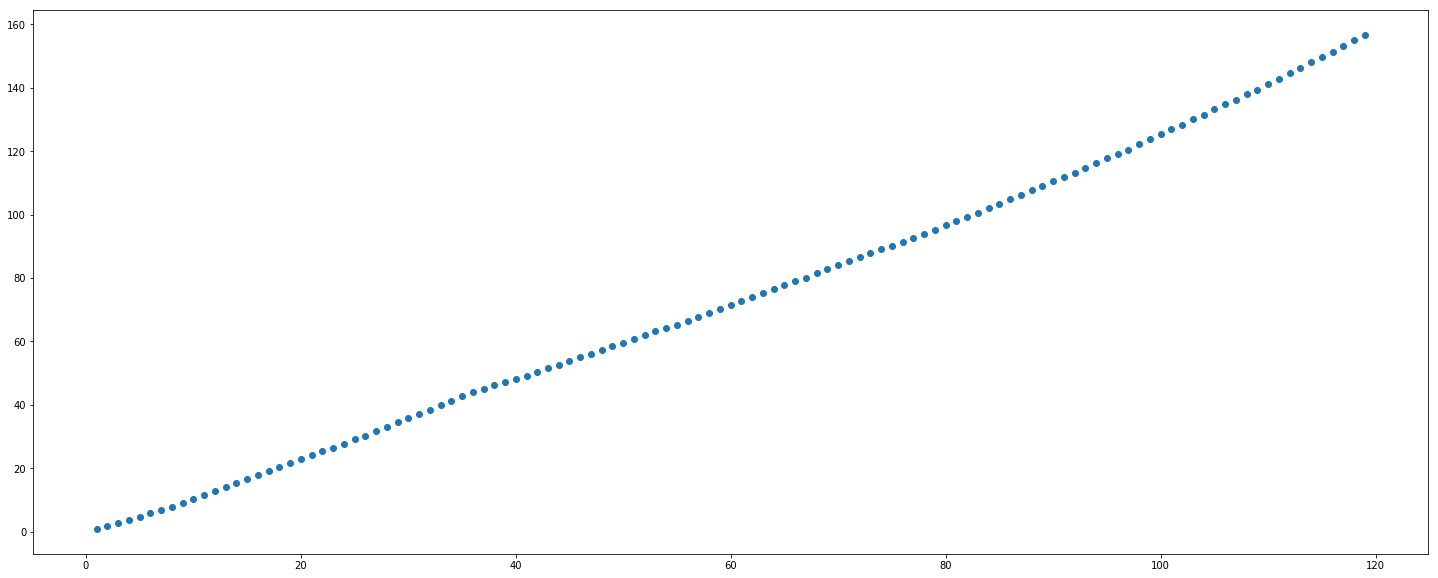

In [50]:
# BALL-BY-BALL AVG RUN

fig =plt.figure(figsize=(25, 10)) 
ax = fig.add_subplot(111)

avgRunList,Balls=[],[]
for b in range(119,0,-1):
    thisBallRuns=[]
    for matchNo in range(len(matches1st5yrs)):  
        try:
            state[matchNo]=''
            thisBallRuns.append(matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])
        except:
            None
    avgRunList.append(np.mean(thisBallRuns))
    Balls.append(120-b)
    
ax.scatter(Balls,avgRunList)
plt.show()

In [55]:
type(inningsTotals)

list

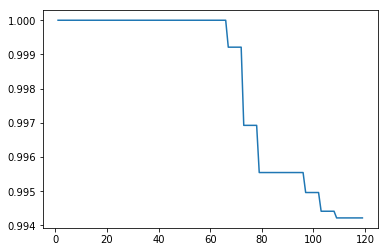

In [56]:
differBalls,Balls=[],[]

for b in range(119,0,-1):
    predictedScoreList=[]
    for matchNo in range(len(matches1st5yrs)):
            try:
                predictedScore=OLSpredict(ballRem=b,wicketRem=matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining'],runScored=matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])                
                predictedScoreList.append(predictedScore)                
            except:
                None
    differBalls.append(np.mean(inningsTotals)/np.mean(predictedScoreList))
    Balls.append(120-b)
    
plt.plot(Balls,differBalls)
plt.show()

In [34]:
F=[]

for b in range(119,0,-1):
    totalRunList=[]
    thisBallTotalList=[]
    predList=[]
    RMSList=[]
    matchNoList=[]
    for matchNo in range(len(matches1st5yrs)):
        matchNoList.append(matchNo)
        try:
            thisBallTotalList.append(matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])

            predictedScore=OLSpredict(ballRem=b,wicketRem=matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining'],runScored=matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])    
            predList.append(predictedScore)

            totalRunThisMatch=inningsTotals[matchNo]
            totalRunList.append(totalRunThisMatch)
            
            RMSList.append(np.sqrt((predictedScore-totalRunThisMatch)**2))
        except:
            None

#     # introduce some floats in our x-values
#     x = thisBallTotalList
#     y = totalRunList

#     # lowess will return our "smoothed" data with a y value for at every x-value
#     lowess = sm.nonparametric.lowess(y, x, frac=.3)

#     # unpack the lowess smoothed points to their values
#     lowess_x = list(zip(*lowess))[0]
#     lowess_y = list(zip(*lowess))[1]

#     # run scipy's interpolation. There is also extrapolation I believe
#     F.append(interp1d(lowess_x, lowess_y, bounds_error=False))

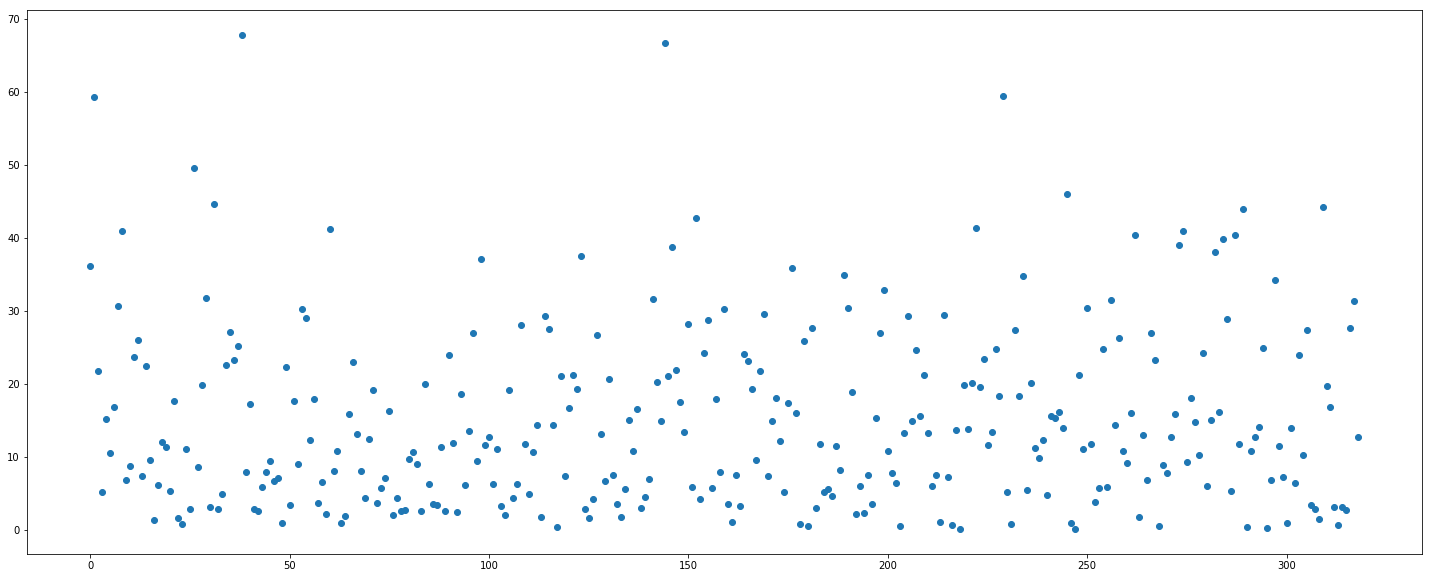

In [13]:
plt.figure(figsize=(25, 10)) 
plt.scatter(matchNoList,RMSList)
plt.show()

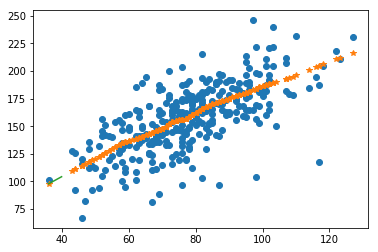

In [23]:
# introduce some floats in our x-values
x = thisBallTotalList
y = totalRunList

# lowess will return our "smoothed" data with a y value for at every x-value
lowess = sm.nonparametric.lowess(y, x, frac=.3)

# unpack the lowess smoothed points to their values
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

# run scipy's interpolation. There is also extrapolation I believe
f = interp1d(lowess_x, lowess_y, bounds_error=False)








xnew = [i/10. for i in range(400)]

# this this generate y values for our xvalues by our interpolator
# it will MISS values outsite of the x window (less than 3, greater than 33)
# There might be a better approach, but you can run a for loop
#and if the value is out of the range, use f(min(lowess_x)) or f(max(lowess_x))
ynew = f(xnew)


plt.plot(x, y, 'o')
plt.plot(lowess_x, lowess_y, '*')
plt.plot(xnew, ynew, '-')
plt.show()

In [8]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
F2=[]
for j in range(120):
    x = np.array(finalX[j])
    y = np.array(finalY[j])


    regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
    regr.fit(x, y)

    F2.append(regr)

C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklea

C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklea

C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklea

C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklea

C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklea

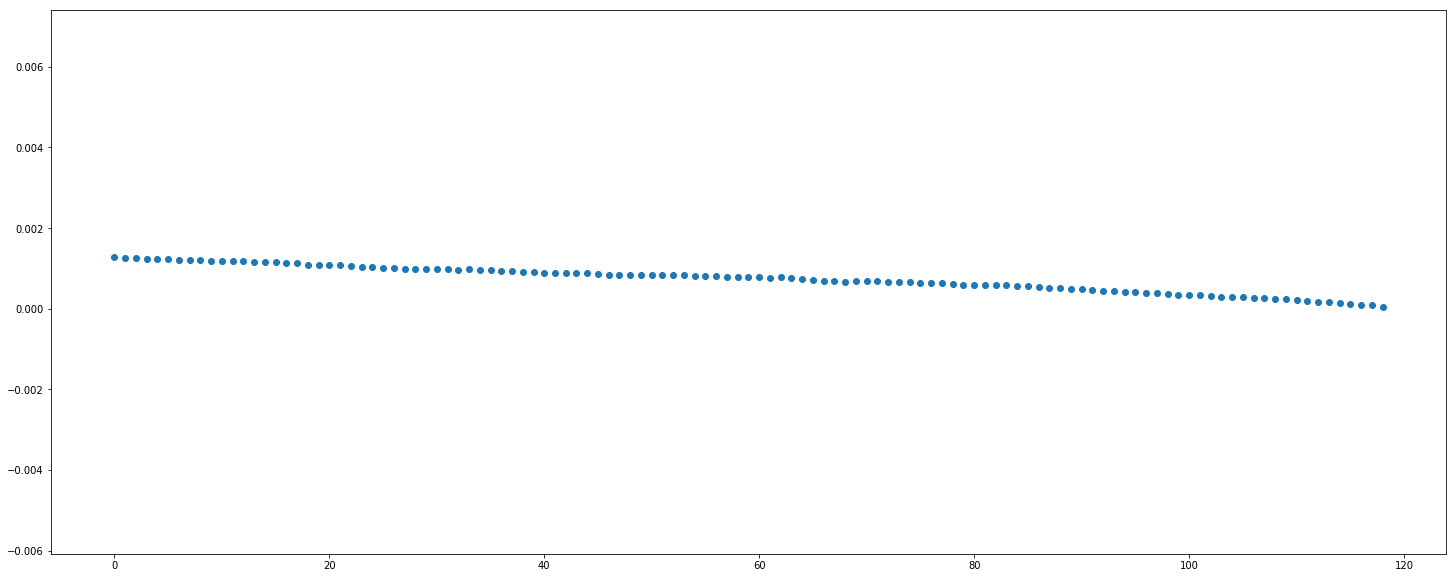

In [30]:
RMSListMean=[]
Balls=[]
for b in range(119,0,-1):
    Balls.append(120-b-1)
    totalRunList=[]
#     thisBallTotalList=[]
    predList=[]
    RMSList=[]
    matchNoList=[]
    for matchNo in range(len(matches1st5yrs)):
        matchNoList.append(matchNo)
        try:
#             thisBallTotalList.append(matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])


#             predictData=[]
#             for i in range(11):
#                 predictData.append(0)
#             predictData[matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']+1]=1
#             predictData.append(matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])
            
# #             predictedScore=results[120-b].predict(predictData)[0]
#             predictedScore=F2[120-b-1].predict([predictData])[0]
    
    
            predictedScore=OLSpredict(ballRem=b,wicketRem=matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining'],runScored=matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])
#             predictedScore=SVRpredict(ballRem=b,wicketRem=matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining'],runScored=matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])
        
        
            predList.append(predictedScore)

            ballRem=list(matches1st5yrs[matchNo]['ourData'].keys())
            ballRem.sort(reverse=True)
            totalRunThisMatch=matches1st5yrs[matchNo]['ourData'][ballRem[-1]]['totalrunscount']

            totalRunList.append(totalRunThisMatch)
            RMSList.append(np.sqrt((predictedScore-totalRunThisMatch)**2)/totalRunThisMatch**2)
#             RMSList.append(np.sqrt((predictedScore-totalRunThisMatch)**2))
            
        except:
            None
    RMSListMean.append(np.mean(RMSList))
fig =plt.figure(figsize=(25, 10)) 
plt.scatter(Balls,RMSListMean)
plt.show()

In [49]:
import scipy.stats as st
import warnings

data=predList

x=np.array(Balls)
y=np.array(predList)

# Distributions to check
DISTRIBUTIONS = [        
    st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
    st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
    st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
    st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
    st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
    st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
    st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
    st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
    st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
]

# Best holders
best_distribution = st.norm
best_params = (0.0, 1.0)
best_sse = np.inf

# Estimate distribution parameters from data
for distribution in DISTRIBUTIONS:

    # Try to fit the distribution
    try:
        
        
        # Ignore warnings from data that can't be fit
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')

            # fit dist to data
            params = distribution.fit(data)

            # Separate parts of parameters
            arg = params[:-2]
            loc = params[-2]
            scale = params[-1]
    #         print(arg,loc,scale)
            # Calculate fitted PDF and error with fit in distribution
            pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
            sse = np.sum(np.power(y - pdf, 2.0))

            # if axis pass in add to plot
            try:
                if ax:
                    pd.Series(pdf, x).plot(ax=ax)
                end
            except Exception:
                pass

            # identify if this distribution is better
            if best_sse > sse > 0:
                best_distribution = distribution
                best_params = params
                best_sse = sse

    except Exception:
        pass

print (best_distribution.name, best_params)

levy (-0.01830646627157398, 0.5902177304841576)
